In [1]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
data.shape

(301, 9)

In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# There is no null values

# Let check the categorical datas
# Don't need car name
flag = True
for col in data.columns:
    if flag:
        flag = False
        continue
    if data[col].dtype =='object':
        print("{} : {}".format(col, data[col].unique()))


Fuel_Type : ['Petrol' 'Diesel' 'CNG']
Seller_Type : ['Dealer' 'Individual']
Transmission : ['Manual' 'Automatic']


In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
# Car name is not so important here
# So let's drop this columns

data.drop('Car_Name', axis=1, inplace=True)

In [16]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
data_corr = data.corr()

<AxesSubplot:>

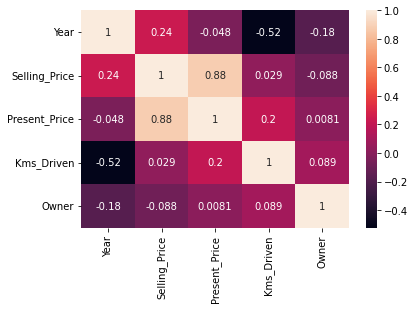

In [18]:
import seaborn as sns
sns.heatmap(data_corr, annot=True)

In [19]:
# Here it seems that Selling price is very co-related with present_price
# But others are not so much good.

In [20]:
# Changing Year as how old car is.
# no of year
data['current_year'] = 2022

In [21]:
data['no_of_year'] = data['current_year'] - data['Year']

In [22]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


<AxesSubplot:xlabel='no_of_year', ylabel='Selling_Price'>

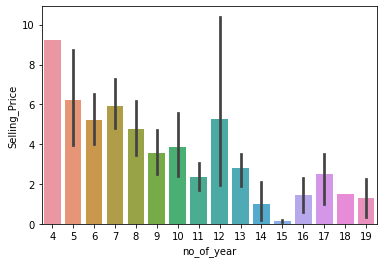

In [23]:
# let's check the relation between the selling price and no_of_year
sns.barplot(x='no_of_year', y='Selling_Price', data = data)

<AxesSubplot:xlabel='no_of_year', ylabel='Selling_Price'>

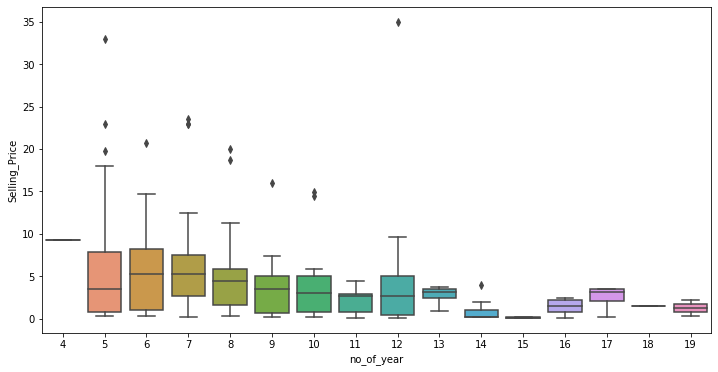

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12 , 6))
sns.boxplot(x='no_of_year', y='Selling_Price', data = data)

<AxesSubplot:xlabel='no_of_year', ylabel='Selling_Price'>

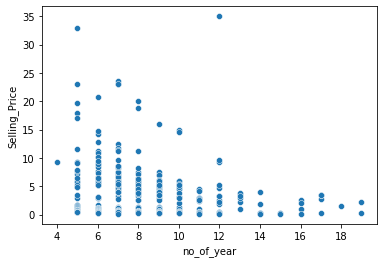

In [27]:
# It seem there are some outliers
sns.scatterplot(x='no_of_year', y='Selling_Price', data = data)

In [31]:
# Let's drop the car price having the 18 selling Price
data = data[data['Selling_Price'] <= 18]

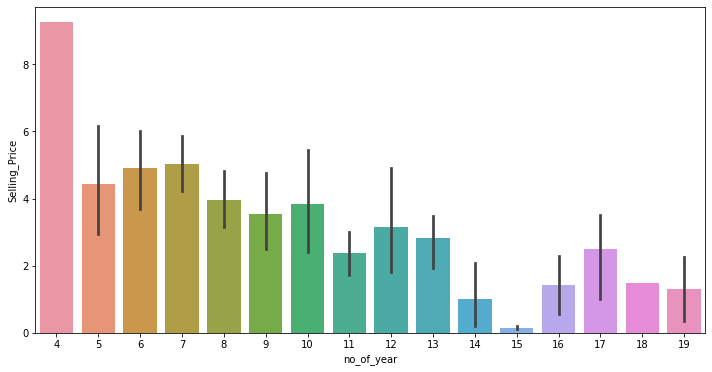

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12 , 6))
sns.barplot(x='no_of_year', y='Selling_Price', data = data)
plt.show()

In [39]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'current_year', 'no_of_year'],
      dtype='object')

In [40]:
# Now Year ans current_year have no works in here
data.drop(['Year', 'current_year'], axis=1, inplace = True)

In [41]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

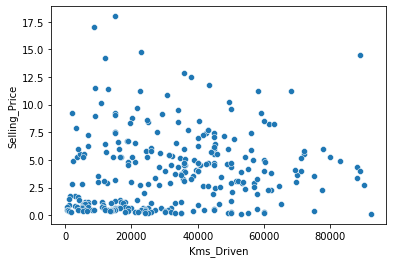

In [44]:
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data = data)

In [43]:
# Here Some cars are drived more so in order to remove the outliers 
# Delete the info for car drived more than 100000
data = data[data['Kms_Driven'] <= 100000]
data.shape

(283, 8)

In [45]:
# Now deal with categorical featrues
# As seen above there are less no of category so one hot encoding is required
data = pd.get_dummies(data, drop_first = True)


In [46]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


<AxesSubplot:>

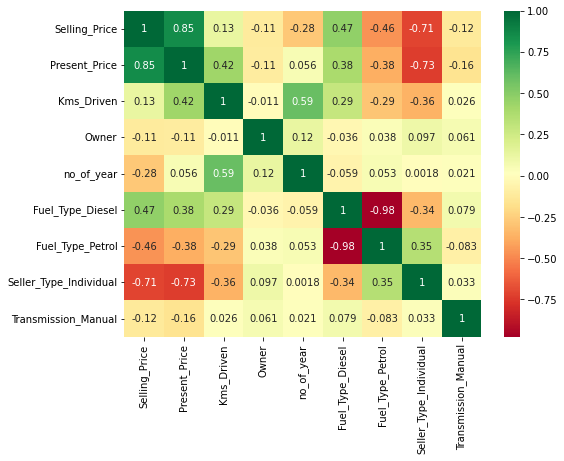

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn')

In [53]:
# Now Extract the feature
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [54]:
X.head(), y.head()

(   Present_Price  Kms_Driven  Owner  no_of_year  Fuel_Type_Diesel  \
 0           5.59       27000      0           8                 0   
 1           9.54       43000      0           9                 1   
 2           9.85        6900      0           5                 0   
 3           4.15        5200      0          11                 0   
 4           6.87       42450      0           8                 1   
 
    Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
 0                 1                       0                    1  
 1                 0                       0                    1  
 2                 1                       0                    1  
 3                 1                       0                    1  
 4                 0                       0                    1  ,
 0    3.35
 1    4.75
 2    7.25
 3    2.85
 4    4.60
 Name: Selling_Price, dtype: float64)

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y )

ExtraTreesRegressor()

In [70]:
model.feature_importances_

array([0.36929381, 0.03524736, 0.00079252, 0.117795  , 0.03404876,
       0.00869237, 0.41448133, 0.01964885])

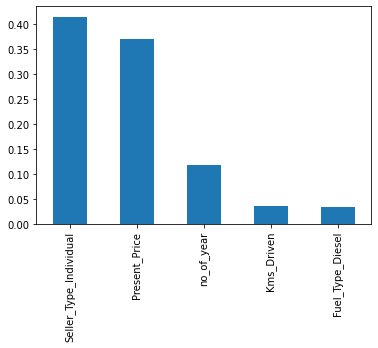

In [71]:
imp_features = pd.Series(model.feature_importances_, index=X.columns)
imp_features.nlargest(5).plot(kind='bar')
plt.show()

<AxesSubplot:>

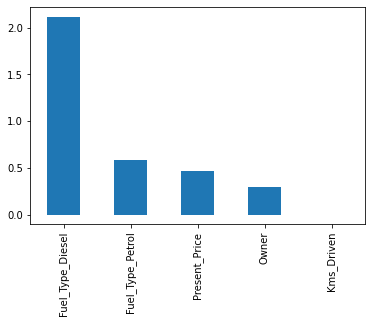

In [72]:
# Let's check the with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
pd.Series(lr.coef_, index=X.columns).nlargest(5).plot(kind='bar')

In [73]:
# Now let's split the train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
X_train.shape, X_test.shape

((226, 8), (57, 8))

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [82]:
# Hyperparameters tunning
# No of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximim number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# Minimum no of samples required to split a node.
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [83]:
n_estimators[:5]

[100, 200, 300, 400, 500]

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf    
}

In [91]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [93]:
 rf_random = RandomizedSearchCV(
     estimator=rf,
     param_distributions=random_grid,
     scoring='neg_mean_squared_error',
     n_iter=10,
     cv=5,
     verbose=2,
     random_state=42,
     n_jobs=1
 )

In [94]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
pred = rf_random.predict(X_test)

In [97]:
pred

array([ 0.56926 ,  3.01116 ,  2.79774 ,  5.08216 ,  2.66174 ,  6.2777  ,
        4.87449 ,  0.56833 ,  0.46636 ,  5.2342  ,  6.25755 ,  3.40071 ,
        1.00382 ,  5.0936  ,  5.33731 ,  2.26832 ,  1.15578 ,  2.76728 ,
        0.39005 ,  9.0875  ,  1.34646 , 12.20565 , 10.38539 ,  8.3225  ,
        0.68865 ,  7.516235,  8.79164 ,  5.11283 ,  8.74184 ,  4.3488  ,
        4.2137  ,  1.06946 ,  0.61913 ,  5.2155  ,  7.96615 ,  5.79066 ,
        4.4727  ,  4.11694 ,  4.92529 ,  1.07468 ,  0.49084 ,  6.681675,
        1.13277 ,  0.39442 ,  0.87271 ,  6.67234 ,  3.36858 ,  4.96411 ,
        4.80885 ,  7.29884 ,  6.243525,  2.52944 ,  0.38161 ,  4.47203 ,
        5.848525,  3.82156 ,  0.76798 ])

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

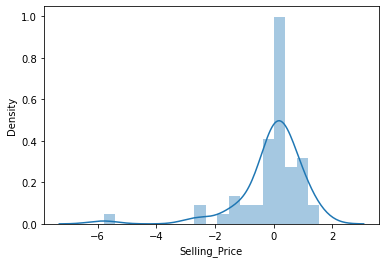

In [100]:
sns.distplot(pred- y_test)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Selling_Price'>

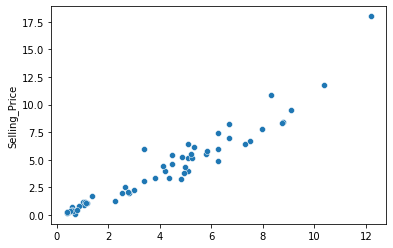

In [102]:
sns.scatterplot(pred, y_test)

In [103]:
# model is best fitted

In [106]:
from sklearn.metrics import mean_squared_error
import math

In [107]:
math.sqrt(mean_squared_error(pred, y_test))

1.1194598417282007